# Churn Analysis

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns


## Dataset 



In [37]:
#df = pd.read_csv('../input/mytest.csv')
df = pd.read_csv('data.csv')

print (df.shape)

df.dtypes

(242, 15)


churn               int64
pageviews           int64
admins              int64
employees           int64
usecompetitors      int64
contractdays        int64
callcycle          object
associateddeals     int64
timescontacted      int64
origsource         object
sessions            int64
FF                  int64
gauge              object
industry           object
strategic           int64
dtype: object

In [4]:
# Load data
df.head(3)

churn  pageviews  admins  employees  usecompetitors  contractdays  \
0      0          1       0       1000               0             0   
1      0          5       0      10000               0             0   
2      1          0       0          0               0             0   

   callcycle  associateddeals  timescontacted      origsource  sessions  FF  \
0    Monthly                2               3  Direct Traffic         0   1   
1  Quarterly                0              13  Direct Traffic         2   0   
2  Quarterly                0               8         Unknown         0   0   

   gauge        industry  strategic  
0  Green    Construction          1  
1  Green  Consumer Goods          1  
2    Red    Oil & Energy          1

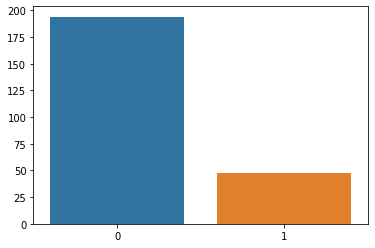

In [44]:
y = df["churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [45]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 19.834710743801654


### Conclusion 1 = Imbalanced data - Lesser datapoints in True Churn category

# Descriptive Analysis

In [46]:
    df.describe()

churn    pageviews      admins     employees  usecompetitors  \
count  242.000000   242.000000  242.000000    242.000000      242.000000   
mean     0.198347    71.194215    7.690083   2127.024793        0.206612   
std      0.399581   199.306306   47.757242   3517.436949        0.405713   
min      0.000000     0.000000    0.000000      0.000000        0.000000   
25%      0.000000     0.000000    0.000000     50.000000        0.000000   
50%      0.000000     3.000000    0.000000    500.000000        0.000000   
75%      0.000000    36.000000    1.000000   1000.000000        0.000000   
max      1.000000  1807.000000  600.000000  10000.000000        1.000000   

       contractdays  associateddeals  timescontacted    sessions          FF  \
count    242.000000       242.000000      242.000000  242.000000  242.000000   
mean       1.760331         2.107438       26.433884   34.082645    0.471074   
std        5.423209         2.298481       47.863197   98.411625    0.500197   
min        0.000000         0.000000        0.000000    0.000000    0.000000   
25%        0.000000         1.000000        8.000000    0.000000    0.000000   
50%        0.000000         2.000000       18.000000    1.000000    0.000000   
75%        2.000000         3.000000       32.000000   13.000000    1.000000   
max       68.000000        21.000000      666.000000  879.000000    1.000000   

        strategic  
count  242.000000  
mean     0.194215  
std      0.396415  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

### Churn By Gauge

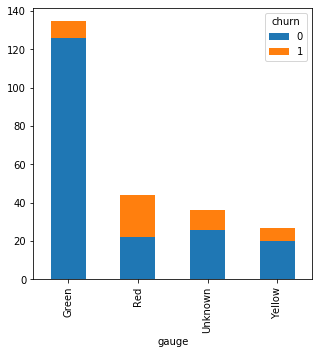

In [47]:
df.groupby(["gauge", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

### Churn By Call Cycle

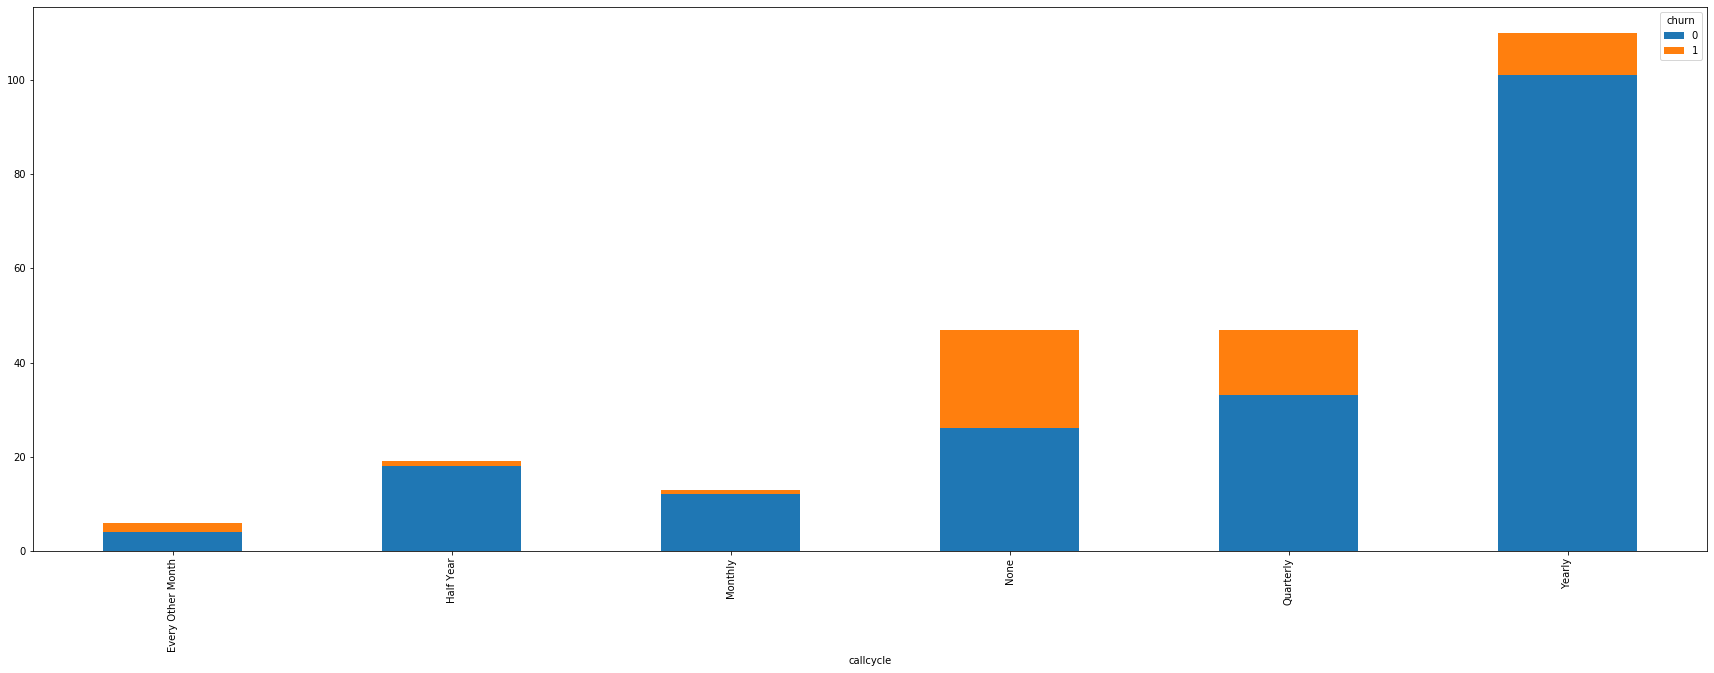

In [48]:
df.groupby(["callcycle", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn By Industry

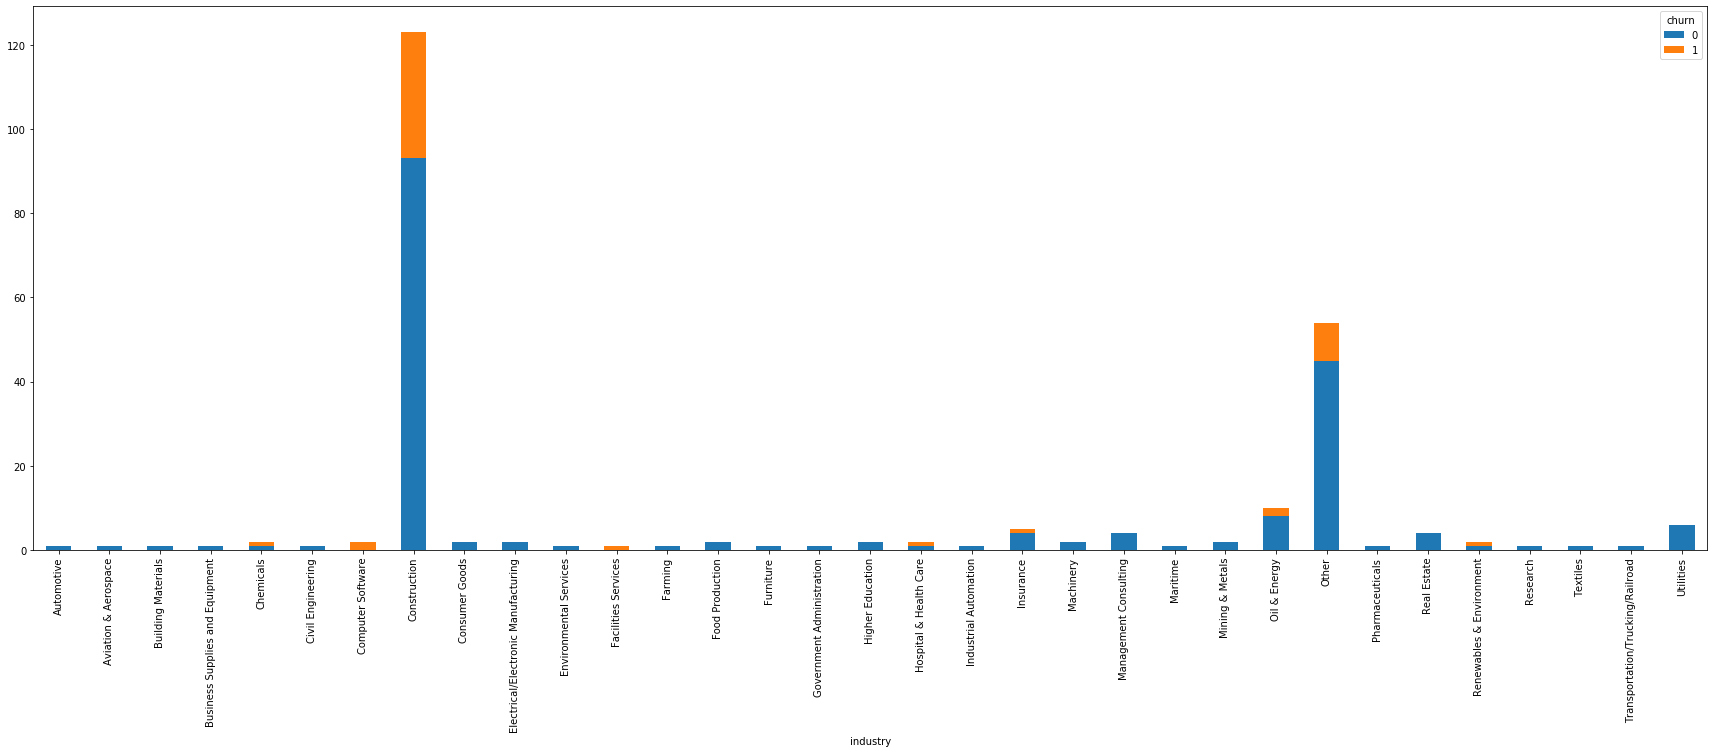

In [49]:
df.groupby(["industry", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

### Churn By Strategic

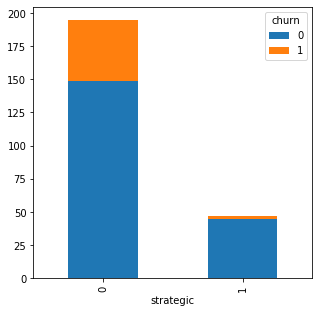

In [50]:
df.groupby(["strategic", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

# Handle Categorical Cols - One Hot Encoding

In [38]:
# One hot encode categoricals
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

df = encode_and_bind(df, 'callcycle')
df = df.drop(['pageviews', 'admins','employees','contractdays','associateddeals','timescontacted',
        'origsource','industry','gauge'], axis = 1) 
#df = encode_and_bind(df, 'gauge')

df.dtypes

churn                           int64
usecompetitors                  int64
callcycle                      object
sessions                        int64
FF                              int64
strategic                       int64
callcycle_Every Other Month     uint8
callcycle_Half Year             uint8
callcycle_Monthly               uint8
callcycle_None                  uint8
callcycle_Quarterly             uint8
callcycle_Yearly                uint8
dtype: object

In [39]:
df.head()

churn  usecompetitors          callcycle  sessions  FF  strategic  \
0      0               0            Monthly         0   1          1   
1      0               0          Quarterly         2   0          1   
2      1               0          Quarterly         0   0          1   
3      0               1  Every Other Month         0   0          1   
4      0               0  Every Other Month         0   0          0   

   callcycle_Every Other Month  callcycle_Half Year  callcycle_Monthly  \
0                            0                    0                  1   
1                            0                    0                  0   
2                            0                    0                  0   
3                            1                    0                  0   
4                            1                    0                  0   

   callcycle_None  callcycle_Quarterly  callcycle_Yearly  
0               0                    0                 0  
1               0                    1                 0  
2               0                    1                 0  
3               0                    0                 0  
4               0                    0                 0

### Strip off Response values

In [40]:
y = df['churn'].values.astype(np.int)
y.size

242

### Strip off Redundant cols

In [41]:
df.drop(["callcycle","churn"], axis = 1, inplace=True)

In [42]:
df.head(3)

usecompetitors  sessions  FF  strategic  callcycle_Every Other Month  \
0               0         0   1          1                            0   
1               0         2   0          1                            0   
2               0         0   0          1                            0   

   callcycle_Half Year  callcycle_Monthly  callcycle_None  \
0                    0                  1               0   
1                    0                  0               0   
2                    0                  0               0   

   callcycle_Quarterly  callcycle_Yearly  
0                    0                 0  
1                    1                 0  
2                    1                 0

### Dataset pared down by RFE Variable Importance

### Build Feature Matrix

In [43]:
X = df.values.astype(np.float)

In [44]:
X

array([[  0.,   0.,   1., ...,   0.,   0.,   0.],
       [  0.,   2.,   0., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   1.,   0.],
       ...,
       [  0., 158.,   1., ...,   0.,   1.,   0.],
       [  0.,   2.,   1., ...,   1.,   0.,   0.],
       [  1.,  89.,   1., ...,   0.,   0.,   0.]])

In [45]:
X.shape

(242, 10)

### Standardize Feature Matrix values

In [46]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [47]:
X

array([[-0.51031036, -0.3470452 ,  1.05962589, ..., -0.49094362,
        -0.49094362, -0.91287093],
       [-0.51031036, -0.32668028, -0.9437293 , ..., -0.49094362,
         2.03689376, -0.91287093],
       [-0.51031036, -0.3470452 , -0.9437293 , ..., -0.49094362,
         2.03689376, -0.91287093],
       ...,
       [-0.51031036,  1.26178365,  1.05962589, ..., -0.49094362,
         2.03689376, -0.91287093],
       [-0.51031036, -0.32668028,  1.05962589, ...,  2.03689376,
        -0.49094362, -0.91287093],
       [ 1.95959179,  0.55919383,  1.05962589, ..., -0.49094362,
        -0.49094362, -0.91287093]])

### Stratified Cross Validation - Since the Response values are not balanced

In [48]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

### Build Models and Train

In [49]:
import warnings
warnings.filterwarnings('ignore')

print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.85
Support vector machine(SVM):   0.83
Random Forest Classifier:      0.84
K Nearest Neighbor Classifier: 0.82
Logistic Regression:           0.86


### Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDClassifier()

In [67]:
#Hyperparameter Tuning, Logistic Regression
# penalty = ['l1', 'l2']
# C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
# solver = ['liblinear', 'saga']

# param_grid = dict(penalty=penalty,
#                   C=C,
#                   class_weight=class_weight,
#                   solver=solver)

# #Hyperparameter Tuning, Logistic Regression

# grid = GridSearchCV(estimator=logistic,
#                     param_grid=param_grid,
#                     scoring='roc_auc',
#                     verbose=0,
#                     n_jobs=-1)


#Hyperparameter Tuning, Logistic Regression
param_grid_logreg = {'penalty':['l1', 'l2', 'elasticnet'],
                     'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                     'class_weight':[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
                     'solver':['liblinear', 'saga']}

#Define the grid search space
grid_logreg = GridSearchCV(logistic, param_grid_logreg, refit = True, verbose = 0)

In [69]:
def stratified_cv_logreg(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    grid_out_logreg = pd.DataFrame(columns=['score', 'params'])
    
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
        
        #Hyperparameter Tuning
        grid_result_logreg = grid_logreg.fit(X_train, y_train)
        
        new_row = pd.DataFrame([[grid_result_logreg.best_score_, grid_result_logreg.best_params_]], 
                               columns=['score', 'params'])
        print(new_row)
        grid_out_logreg = grid_out_logreg.append(new_row, ignore_index = True)
    return grid_out_logreg
    
hyper_logreg = stratified_cv_logreg(X, y, linear_model.LogisticRegression)
hyper_logreg.sort_values(by='score', ascending = False)

      score  \
0  0.843975   

                                                                                params  
0  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}  
     score  \
0  0.84852   

                                                                                params  
0  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}  
      score  \
0  0.839958   

                                                                                 params  
0  {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}  
      score  \
0  0.854017   

                                                                                params  
0  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}  
      score  \
0  0.863108   

                                                                           params  
0  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'p

score  \
8  0.881395   
4  0.863108   
7  0.858562   
9  0.858562   
5  0.858351   
3  0.854017   
6  0.853911   
1  0.848520   
0  0.843975   
2  0.839958   

                                                                                 params  
8  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}   
4  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}        
7  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'saga'}        
9  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'saga'}        
5  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}   
3  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}   
6  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'saga'}        
1  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}   
0  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}   
2  {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}

In [53]:
#Hyperparameter Tuning, SVM
param_grid_svc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

#Define the grid search space
grid_svc = GridSearchCV(svm.SVC(), param_grid_svc, refit = True, verbose = 0)

In [54]:
def stratified_cv_svc(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    grid_out_svc = pd.DataFrame(columns=['score', 'params'])
    
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
        #Hyperparameter Tuning
        grid_result_svc = grid_svc.fit(X_train, y_train)
        new_row = pd.DataFrame([[grid_result_svc.best_score_, 
                                 grid_result_svc.best_params_]], 
                               columns=['score', 'params'])
        
        #Check out ROC in parallel to best_score
        #Precision Recall Curves if data is inherently imbalanced; specificity vs sensitivity
        #Adjusting C for misclassifications
        
        print(new_row)
        grid_out_svc = grid_out_svc.append(new_row, ignore_index = True)
        #grid_out_svc.append(new_row, ignore_index = True)
    #return grid_out_svc
    return grid_out_svc
    
    #return grid_result_svc
#grid_out_svc = stratified_cv_svc(X, y, svm.SVC)

#print('Previous Score: ', metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC)))
hyper_svc = stratified_cv_svc(X, y, svm.SVC)
hyper_svc.sort_values(by='score', ascending = False)

      score                                      params
0  0.866702  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
      score                                 params
0  0.848414  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
      score                                      params
0  0.853911  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
      score                                      params
0  0.853805  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
      score                                      params
0  0.858351  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
      score                                      params
0  0.867653  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
      score                                      params
0  0.849154  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
     score                                      params
0  0.84482  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
      score                                      params
0  0.853805  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
    

score                                      params
9  0.872093  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
5  0.867653  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0  0.866702  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
4  0.858351  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
2  0.853911  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
3  0.853805  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
8  0.853805  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
6  0.849154  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
1  0.848414       {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
7  0.844820  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

### Confusion Matrices for various models

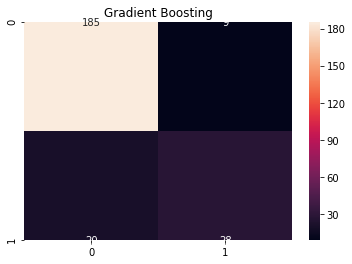

In [72]:
grad_ens_conf_matrix      = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

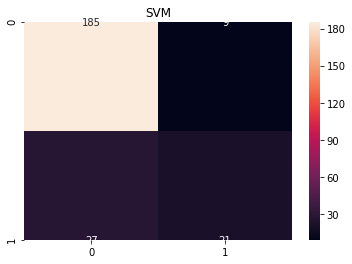

In [75]:
svm_svc_conf_matrix       = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

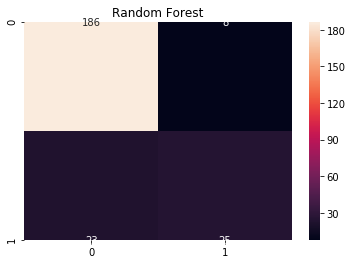

In [74]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

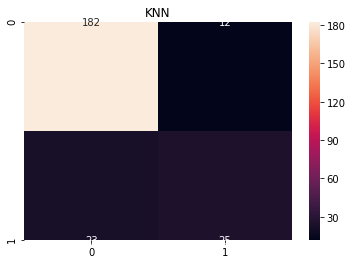

In [76]:
k_neighbors_conf_matrix   = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
sns.heatmap(k_neighbors_conf_matrix, annot=True,  fmt='');
title = 'KNN'
plt.title(title);

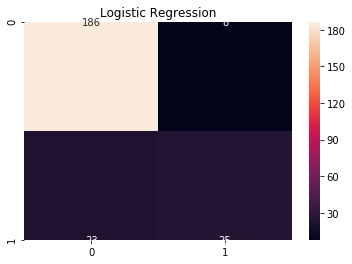

In [77]:
logistic_reg_conf_matrix  = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
sns.heatmap(logistic_reg_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

### classification_report

In [78]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       194
           1       0.69      0.56      0.62        48

    accuracy                           0.86       242
   macro avg       0.79      0.75      0.77       242
weighted avg       0.86      0.86      0.86       242


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       194
           1       0.76      0.52      0.62        48

    accuracy                           0.87       242
   macro avg       0.82      0.74      0.77       242
weighted avg       0.86      0.87      0.86       242


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       194
           1       0.70      0.40      0.51        48

    accuracy                           0.85       242
   macro avg       0.78      0.68     

### Final Model Selection

Gradient Boosting seems to do comparatively for this case

In [79]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[0.04710938 0.059472   0.11117114 0.0128723  0.02627995 0.08049352
 0.20265925 0.06925243 0.00163916 0.00723904 0.00393955 0.00095888
 0.         0.09431344 0.02487509 0.06349257 0.08384526 0.09030763
 0.00916826 0.01091116]


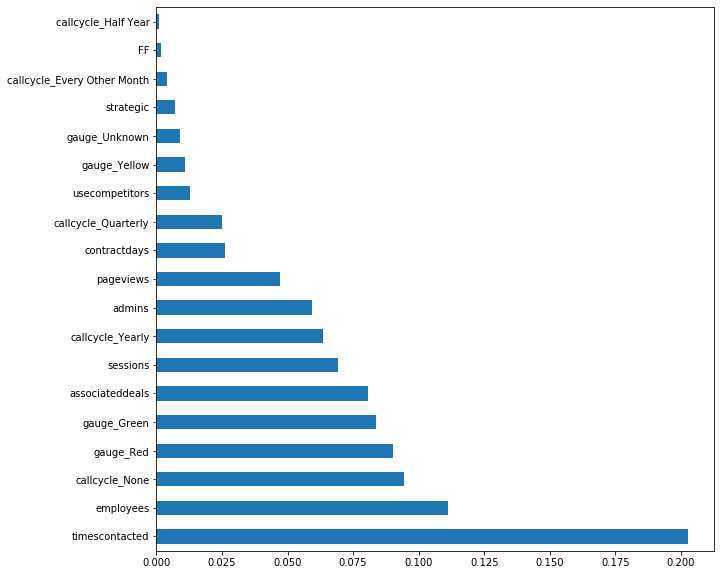

In [80]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 